In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/RS.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-30,161.320007,163.610001,159.919998,160.309998,152.535828,332200
1,2021-05-03,163.050003,165.839996,162.080002,164.550003,156.570236,302400
2,2021-05-04,163.699997,169.839996,163.699997,168.850006,160.661713,375800
3,2021-05-05,169.839996,172.220001,167.509995,171.300003,162.992905,388200
4,2021-05-06,172.529999,175.000000,170.360001,174.990005,166.503967,351400
...,...,...,...,...,...,...,...
749,2024-04-23,315.989990,317.079987,312.420013,313.940002,313.940002,233200
750,2024-04-24,317.250000,319.769989,310.579987,313.559998,313.559998,301000
751,2024-04-25,295.410004,295.410004,281.220001,292.130005,292.130005,920200
752,2024-04-26,290.390015,298.000000,289.899994,290.619995,290.619995,488500


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2021-04-30,160.309998
1,2021-05-03,164.550003
2,2021-05-04,168.850006
3,2021-05-05,171.300003
4,2021-05-06,174.990005
...,...,...
749,2024-04-23,313.940002
750,2024-04-24,313.559998
751,2024-04-25,292.130005
752,2024-04-26,290.619995


In [ ]:
df['Date']

0      2021-04-30
1      2021-05-03
2      2021-05-04
3      2021-05-05
4      2021-05-06
          ...    
749    2024-04-23
750    2024-04-24
751    2024-04-25
752    2024-04-26
753    2024-04-29
Name: Date, Length: 754, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2021-04-29')
datetime_object

datetime.datetime(2021, 4, 29, 0, 0)

In [ ]:
df

,Date,Close
0,2021-04-30,160.309998
1,2021-05-03,164.550003
2,2021-05-04,168.850006
3,2021-05-05,171.300003
4,2021-05-06,174.990005
...,...,...
749,2024-04-23,313.940002
750,2024-04-24,313.559998
751,2024-04-25,292.130005
752,2024-04-26,290.619995


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

NameError: name 'str_to_datetime' is not defined

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2021-04-30,160.309998
2021-05-03,164.550003
2021-05-04,168.850006
2021-05-05,171.300003
2021-05-06,174.990005
...,...
2024-04-23,313.940002
2024-04-24,313.559998
2024-04-25,292.130005


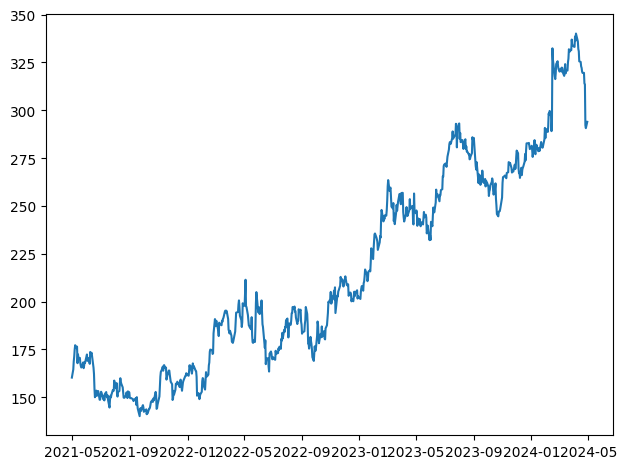

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
plt.tight_layout()

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-04-23'
windowed_df = df_to_windowed_df(dataframe=df,
                                first_date_str='2021-05-05',
                                last_date_str='2024-04-26',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-05-05,160.309998,164.550003,168.850006,171.300003
1,2021-05-06,164.550003,168.850006,171.300003,174.990005
2,2021-05-07,168.850006,171.300003,174.990005,177.240005
3,2021-05-10,171.300003,174.990005,177.240005,175.679993
4,2021-05-11,174.990005,177.240005,175.679993,176.479996
...,...,...,...,...,...
745,2024-04-22,322.119995,320.160004,319.489990,319.540009
746,2024-04-23,320.160004,319.489990,319.540009,313.940002
747,2024-04-24,319.489990,319.540009,313.940002,313.559998
748,2024-04-25,319.540009,313.940002,313.559998,292.130005


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((750,), (750, 3, 1), (750,))

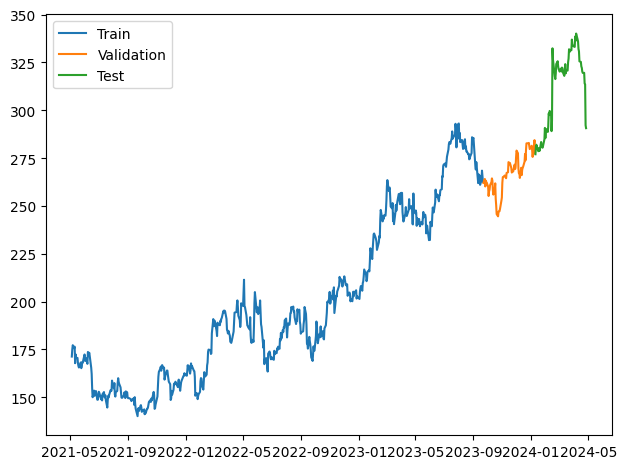

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
plt.tight_layout()

In [ ]:
! pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
19/19 [==============================] - 3s 32ms/step - loss: 40324.2539 - mean_absolute_error: 196.4190 - val_loss: 69989.6641 - val_mean_absolute_error: 264.3762
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 39686.5938 - mean_absolute_error: 194.7800 - val_loss: 68940.5234 - val_mean_absolute_error: 262.3842
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 38398.6328 - mean_absolute_error: 191.4362 - val_loss: 66237.1172 - val_mean_absolute_error: 257.1809
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 35533.4766 - mean_absolute_error: 183.8073 - val_loss: 60834.4258 - val_mean_absolute_error: 246.4535
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 30592.4961 - mean_absolute_error: 169.6805 - val_loss: 51993.3281 - val_mean_absolute_error: 227.8100
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 23002.4355 - mean_absolute_error: 145.4839 - val_lo

19/19 [==============================] - 0s 2ms/step


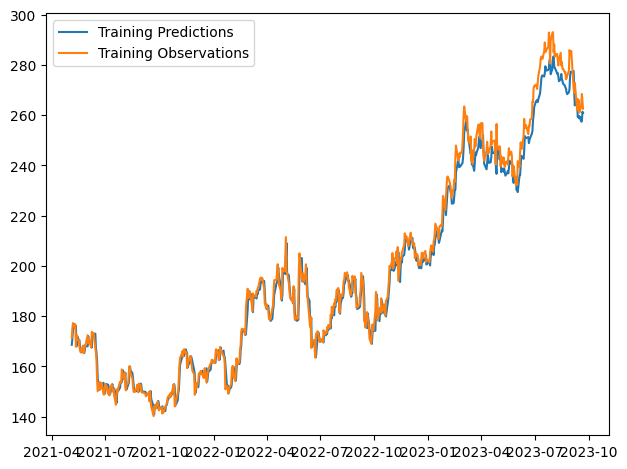

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.tight_layout()

3/3 [==============================] - 0s 6ms/step


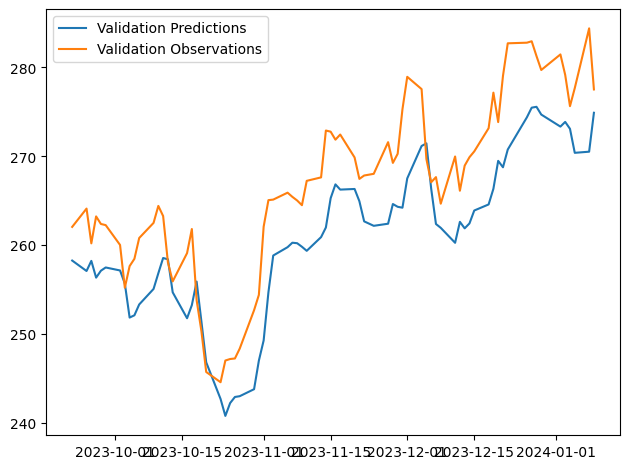

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.tight_layout()

3/3 [==============================] - 0s 4ms/step


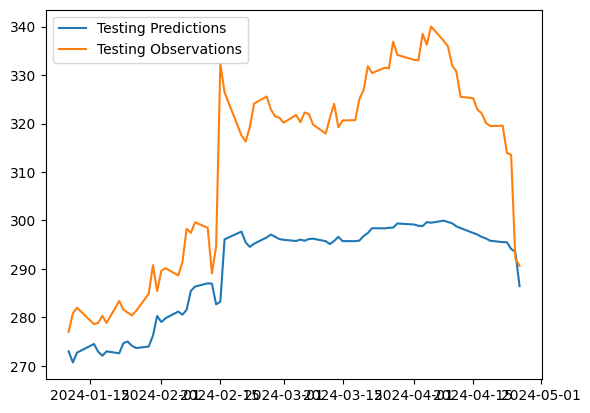

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

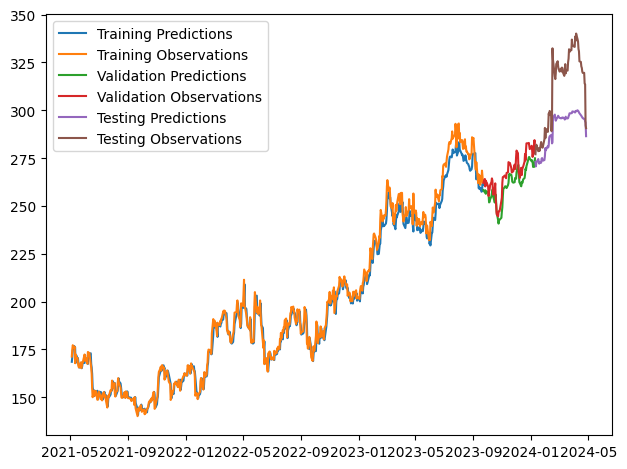

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
plt.tight_layout()

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


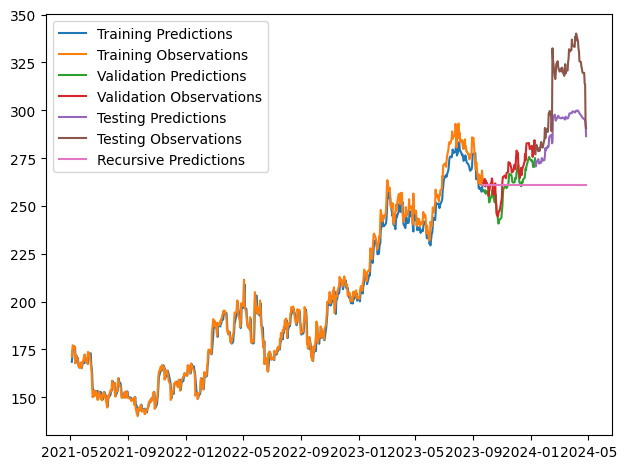

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
plt.tight_layout()